In [1]:
# Importar bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Defina os caminhos das pastas (ajuste se necessário)
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

# Parâmetros básicos
img_height, img_width = 150, 150
batch_size = 32


In [3]:
# Aumento e normalização dos dados de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalização para validação e teste (sem aumento)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Criar geradores
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\marcosvinicius\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


c:\Users\marcosvinicius\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7354 - loss: 0.5641 - val_accuracy: 0.5625 - val_loss: 1.0666
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 161s 989ms/step - accuracy: 0.8298 - loss: 0.3598 - val_accuracy: 0.8750 - val_loss: 0.5570
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8817 - loss: 0.2815 - val_accuracy: 0.6875 - val_loss: 0.7325
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8836 - loss: 0.2737 - val_accuracy: 0.6875 - val_loss: 0.7353
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.8896 - loss: 0.2606 - val_accuracy: 0.7500 - val_loss: 0.4608
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9066 - loss: 0.2216 - val_accuracy: 0.7500 - val_loss: 0.6626
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.9078 - loss: 0.2183 - val_accuracy: 0.7500 - val_loss: 0.8320
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.9137 - loss: 0.2055 - val_a

In [6]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8339 - loss: 0.4127
Test accuracy: 0.8339


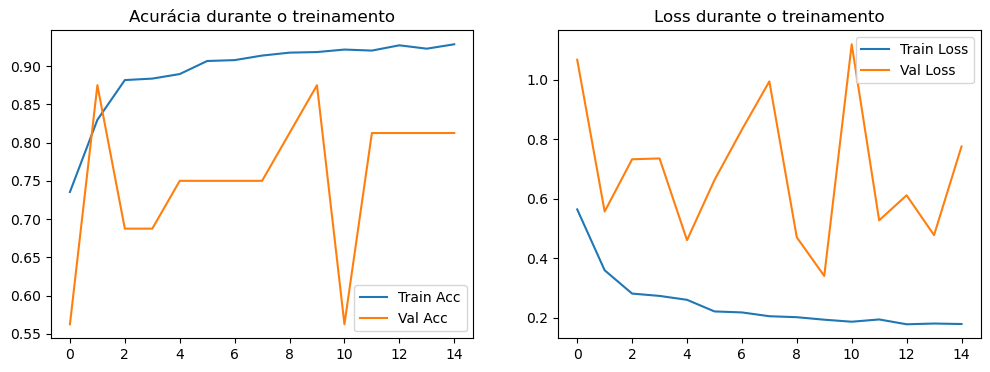

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Acurácia durante o treinamento')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss durante o treinamento')

plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step


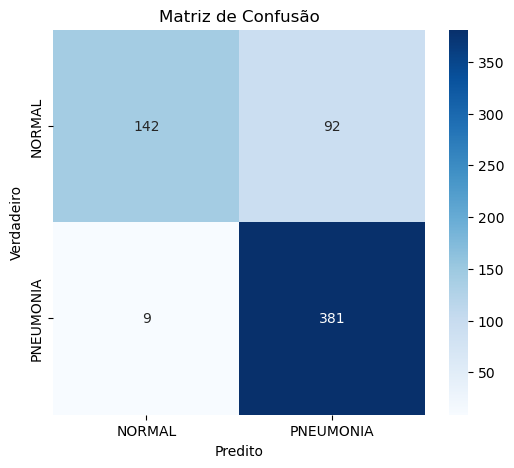

              precision    recall  f1-score   support

      NORMAL       0.94      0.61      0.74       234
   PNEUMONIA       0.81      0.98      0.88       390

    accuracy                           0.84       624
   macro avg       0.87      0.79      0.81       624
weighted avg       0.86      0.84      0.83       624



In [8]:
# Prever classes para o conjunto de teste
test_generator.reset()
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size+1)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)

# Classes reais
y_true = test_generator.classes

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred[:len(y_true)])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de classificação
print(classification_report(y_true, y_pred[:len(y_true)], target_names=['NORMAL', 'PNEUMONIA']))
